# **Importing Required Libraries**

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Reading all the csv files**

In [2]:
local_folder_path = '/kaggle/input/ecg-data'

csv_files = [file for file in os.listdir(local_folder_path) if file.endswith('.csv')]

dataframes = []
for file in csv_files:
    file_path = os.path.join(local_folder_path, file)
    data = pd.read_csv(file_path)
    dataframes.append(data)
    
df = pd.concat(dataframes, ignore_index=True)  
#df.shape

In [3]:
data = df.sample(frac = 0.1, random_state = 1)
#data.shape

In [4]:
peak = data[data['Label']==1]
not_peak = data[data['Label']==0]

print("Peak : {}".format(len(peak)))
print("Not Peak : {}".format(len(not_peak)))

Peak : 4497
Not Peak : 2895481


In [5]:
data.drop(['Time'], axis = 1, inplace = True)

# **Train - Test Split**

In [12]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = X.values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Hyperparameter Tuning**

In [13]:
params={
"n_estimators"     : [100, 200, 300],
"learning_rate"    : [0.05, 0.10, 0.15, 0.01],
"max_depth"        : [5, 6, 8, 10, 12],
"min_child_weight" : [3, 5, 7],
"gamma"            : [0.1, 0.2 , 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]    
}

In [14]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

# **Defining the model**

In [15]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [17]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=200;, score=0.807 total time= 7.3min
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=200;, score=0.818 total time= 7.1min
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=200;, score=0.793 total time= 6.7min
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=200;, score=0.822 total time= 4.5min
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=200;, score=0.790 total time= 4.4min
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200;, score=0.814 total time= 4.1min
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_est

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15,
                                                          0.01],
                                        'max_depth': [5, 6, 8, 10, 12],
                                        'min_child_weight': [3, 5, 7],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=3)

In [19]:
best_paramas = random_search.best_params_

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=200;, score=0.822 total time= 7.6min
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=200;, score=0.811 total time= 6.9min
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=200;, score=0.814 total time= 5.0min
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=200;, score=0.814 total time= 4.7min
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=200;, score=0.802 total time= 4.6min
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_estimators=200;, score=0.827 total time= 4.2min
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5, n_es

In [27]:
print("Best parameters : ", best_paramas)

Best parameters :  {'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.4}


In [22]:
best_classifier=xgboost.XGBClassifier(n_estimators= 300,
 min_child_weight= 5,
 max_depth= 5,
 learning_rate= 0.1,
 gamma= 0.3,
 colsample_bytree= 0.4)

# **Training the model**

In [23]:
best_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# **Testing the model**

In [25]:
y_pred = best_classifier.predict(X_test)

# **Model Evaluation**

In [37]:
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    579059
         1.0       0.00      0.00      0.00       937

    accuracy                           1.00    579996
   macro avg       0.50      0.50      0.50    579996
weighted avg       1.00      1.00      1.00    579996



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
len(y_pred[y_pred ==0])

579996

In [35]:
roc_auc = roc_auc_score(y_test, y_pred)
mcc_score = matthews_corrcoef(y_test, y_pred)
print("ROC-AUC score", roc_auc)
print("Matthews Correlation Coefficient:", mcc_score)

ROC-AUC score 0.5
Matthews Correlation Coefficient: 0.0


# **ROC Curve**

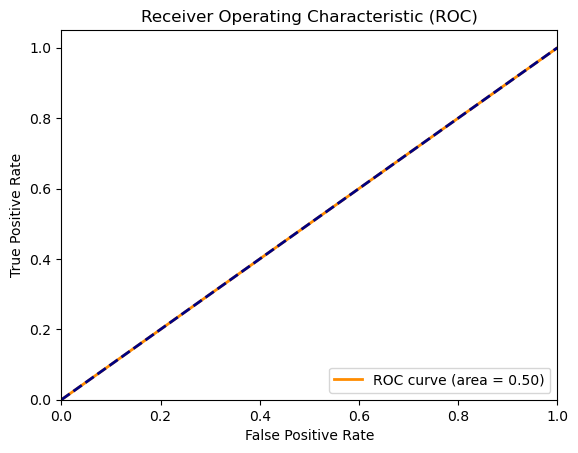

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_curve = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# **Re-scaling the Features**

In [11]:
from sklearn.preprocessing import RobustScaler
new_data = data.copy()
new_data['Raw'] = RobustScaler().fit_transform(new_data['Raw'].to_numpy().reshape(-1,1))
# new_data

In [12]:
X_scaled = new_data.iloc[:,:-1]
Y_scaled = new_data.iloc[:,-1]

X_scaled = X_scaled.values.reshape(-1,1)

# Split the data into training and testing sets
X_scaled_train, X_scaled_test, y_scaled_train, yscaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [13]:
import xgboost
classifier=xgboost.XGBClassifier(n_estimators= 300,
 min_child_weight= 5,
 max_depth= 5,
 learning_rate= 0.1,
 gamma= 0.3,
 colsample_bytree= 0.4)

# **Training and Testing with scaled data**

In [14]:
classifier.fit(X_scaled_train, y_scaled_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [16]:
pred_y = classifier.predict(X_scaled_test)

In [17]:
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef, roc_curve, auc
print(classification_report(yscaled_test, pred_y))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    579059
         1.0       0.00      0.00      0.00       937

    accuracy                           1.00    579996
   macro avg       0.50      0.50      0.50    579996
weighted avg       1.00      1.00      1.00    579996



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
roc_auc = roc_auc_score(yscaled_test, pred_y)
mcc_score = matthews_corrcoef(yscaled_test, pred_y)
print("ROC-AUC score", roc_auc)
print("Matthews Correlation Coefficient:", mcc_score)

ROC-AUC score 0.5
Matthews Correlation Coefficient: 0.0
